In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv("/content/sample_data/california_housing_train.csv")
df_test = pd.read_csv("/content/sample_data/california_housing_test.csv")

In [3]:
print(df_train.shape, df_test.shape)

(17000, 9) (3000, 9)


In [4]:
df_train.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0
16999,-124.35,40.54,52.0,1820.0,300.0,806.0,270.0,3.0147,94600.0


In [5]:
df_test.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0
2999,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0


In [6]:
df_x_train = df_train.drop(labels=["median_house_value"], axis=1)
df_y_train = df_train[["median_house_value"]]
df_x_test = df_test.drop(labels=["median_house_value"], axis=1)
df_y_test = df_test[["median_house_value"]]

In [7]:
print(df_x_train.shape, df_y_train.shape, df_x_test.shape, df_y_test.shape)

(17000, 8) (17000, 1) (3000, 8) (3000, 1)


In [8]:
#### normalizaion
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_nrm = scaler.fit_transform(df_x_train) # obtain normalization parameters of train dataframe and then normalize it
x_test_nrm = scaler.transform(df_x_test) # normalize test dataframe w.r.t. the normalization parameters of train dataframe

In [9]:
print(type(x_train_nrm), x_train_nrm.shape, type(x_test_nrm), x_test_nrm.shape) # x_nrm is not a data frame

<class 'numpy.ndarray'> (17000, 8) <class 'numpy.ndarray'> (3000, 8)


In [10]:
print(df_x_train.values[0], x_train_nrm[0])

[-1.1431e+02  3.4190e+01  1.5000e+01  5.6120e+03  1.2830e+03  1.0150e+03
  4.7200e+02  1.4936e+00] [ 2.619365   -0.67152023 -1.07967114  1.36169494  1.76420407 -0.36118401
 -0.07599796 -1.25254316]


In [11]:
print(df_x_test.values[0], x_test_nrm[0])

[-122.05     37.37     27.     3885.      661.     1537.      606.
    6.6085] [-1.24077729  0.81635434 -0.12627375  0.56945057  0.28847666  0.09359145
  0.27249795  1.42808099]


In [12]:
print(x_train_nrm.mean(0), x_train_nrm.std(0)) # mean and standard deviation

[-6.63396135e-15  2.67498442e-17 -7.60698694e-17 -9.02807241e-17
 -8.69369936e-17  7.35620715e-17  2.00623831e-17 -3.64466627e-16] [1. 1. 1. 1. 1. 1. 1. 1.]


In [13]:
print(x_test_nrm.mean(0), x_test_nrm.std(0)) # mean and standard deviation

[-0.01351138  0.00475619  0.02033759 -0.0202239  -0.02244472 -0.02332708
 -0.02941394 -0.03999072] [0.99476155 0.99627452 0.99735719 0.98869255 0.98599727 0.8976773
 0.9502022  0.97175318]


In [14]:
y_train = df_y_train.values # change the dataframe to an array, similar to x_nrm
y_test = df_y_test.values 
print(type(y_train), type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [15]:
print(x_train_nrm.shape, type(x_train_nrm.shape),
      x_train_nrm.shape[0], x_train_nrm.shape[1], x_train_nrm.shape[1:])

(17000, 8) <class 'tuple'> 17000 8 (8,)


In [16]:
from keras.models import Sequential 

''' 
Keras is a neural network Application Programming Interface (API) for Python integrated with TensorFlow.

Sequential is a class. The core idea of Sequential API is simply arranging the Keras layers in a sequential order 
and so, it is called Sequential API. Most of the ANN also has layers in sequential order and the data flows from one 
layer to another layer in the given order until the data finally reaches the output layer.
'''

from keras.layers import Dense # creat pattern for NN layers; Dense is a Class

model = Sequential() # an empty model, with no layers and neurons; model is an object from Sequential

# add the above created Dense NN
model.add(Dense(512, activation="relu", input_shape=x_train_nrm.shape[1:])) 
# .add is a function in Sequential; first hidden layer with 512 neurons and a Rectified Linear Unit (ReLU) activation function

model.add(Dense(256, activation="relu")) 
# second hidden layer with 256 neurons 

model.add(Dense(64, activation="relu")) 
# third hidden layer with 64 neurons 

model.add(Dense(32, activation="relu")) 
# forth hidden layer with 32 neurons 

model.add(Dense(1, activation="linear")) 
# fifth layer (output layer) with 1 neuron and a linear activation function

In [17]:
model.summary() 
# 4608 = 8 weights pertaining to 8 inputs * 512 neurons + 512 biases; 
# 131328 = 512 weights pertainig to 512 inputs * 256 neurons + 256 biases

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               4608      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 154,497
Trainable params: 154,497
Non-trainable params: 0
_________________________________________________________________


In [18]:
'''Once the model is created, you can config the model with losses and metrics with model.compile(), train the model with model.fit(),
or use the model to do prediction with model.predict().'''
model.compile(optimizer='adam', loss='mae', metrics='acc') 

In [19]:
results = model.fit(x_train_nrm, y_train, epochs=30, 
          validation_data=(x_test_nrm, y_test), batch_size=32) 
# epochs indicates the number of obtaining the wieghts via optimization

Epoch 1/30
532/532 [==============================] - 4s 5ms/step - loss: 103851.1797 - acc: 0.0000e+00 - val_loss: 54691.1406 - val_acc: 0.0000e+00
Epoch 2/30
532/532 [==============================] - 2s 4ms/step - loss: 49811.5195 - acc: 0.0000e+00 - val_loss: 47386.4492 - val_acc: 0.0000e+00
Epoch 3/30
532/532 [==============================] - 2s 4ms/step - loss: 46904.5195 - acc: 0.0000e+00 - val_loss: 46322.6836 - val_acc: 0.0000e+00
Epoch 4/30
532/532 [==============================] - 2s 4ms/step - loss: 46197.0938 - acc: 0.0000e+00 - val_loss: 46037.0664 - val_acc: 0.0000e+00
Epoch 5/30
532/532 [==============================] - 2s 4ms/step - loss: 45806.5430 - acc: 0.0000e+00 - val_loss: 45865.1289 - val_acc: 0.0000e+00
Epoch 6/30
532/532 [==============================] - 2s 4ms/step - loss: 45470.4336 - acc: 0.0000e+00 - val_loss: 45330.8789 - val_acc: 0.0000e+00
Epoch 7/30
532/532 [==============================] - 2s 4ms/step - loss: 45256.6133 - acc: 0.0000e+00 - val_lo

In [20]:
yhat_test = model.predict(x_test_nrm)

94/94 [==============================] - 0s 1ms/step


In [21]:
print(yhat_test.shape)

(3000, 1)


In [22]:
import matplotlib.pyplot as plt

In [23]:
print(type(results), type(results.history),  # results is an object with some attributes and results.history is a dictionary with key "loss"
      results.history)

<class 'keras.callbacks.History'> <class 'dict'> {'loss': [103851.1796875, 49811.51953125, 46904.51953125, 46197.09375, 45806.54296875, 45470.43359375, 45256.61328125, 44956.7265625, 44852.44140625, 44614.1484375, 44464.41015625, 44257.0390625, 44075.03125, 43940.609375, 43834.20703125, 43521.8125, 43293.265625, 43119.36328125, 42867.6640625, 42605.57421875, 42446.921875, 42156.8671875, 41966.82421875, 41706.87890625, 41495.453125, 41252.90234375, 41082.53515625, 40900.25390625, 40673.390625, 40435.3828125], 'acc': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'val_loss': [54691.140625, 47386.44921875, 46322.68359375, 46037.06640625, 45865.12890625, 45330.87890625, 45059.0234375, 45171.2109375, 44652.72265625, 44581.78515625, 44354.09765625, 44599.98828125, 44582.31640625, 44036.3828125, 43822.796875, 43619.59765625, 43464.14453125, 43388.0703125, 42985.2265625, 42949.77734375, 426

In [24]:
print(type(results.history['loss']), results.history['loss']) # the key "loss" is a list

<class 'list'> [103851.1796875, 49811.51953125, 46904.51953125, 46197.09375, 45806.54296875, 45470.43359375, 45256.61328125, 44956.7265625, 44852.44140625, 44614.1484375, 44464.41015625, 44257.0390625, 44075.03125, 43940.609375, 43834.20703125, 43521.8125, 43293.265625, 43119.36328125, 42867.6640625, 42605.57421875, 42446.921875, 42156.8671875, 41966.82421875, 41706.87890625, 41495.453125, 41252.90234375, 41082.53515625, 40900.25390625, 40673.390625, 40435.3828125]


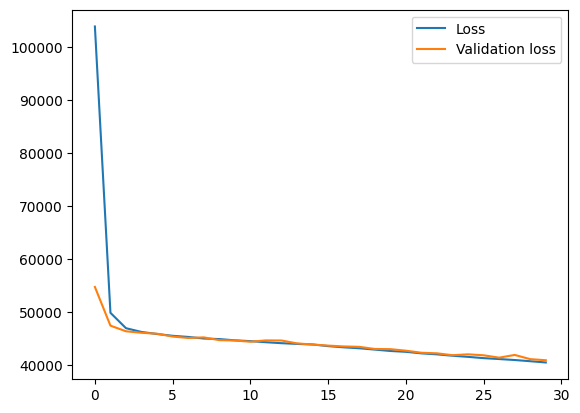

In [25]:
plt.plot(results.history['loss'], label="Loss")
plt.plot(results.history['val_loss'], label="Validation loss")
plt.legend()

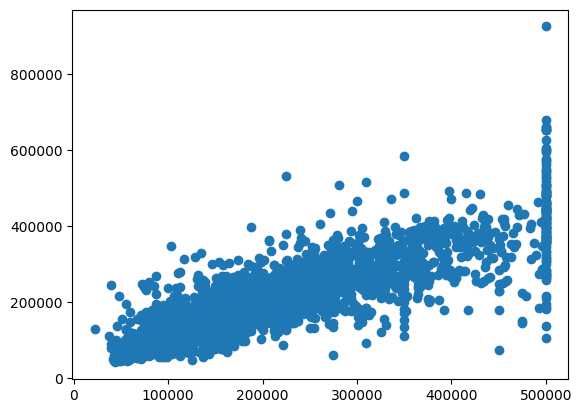

In [26]:
plt.scatter(y_test, yhat_test)